In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [144]:
df_casos_hosp_uci_def = pd.read_csv('../data/casos_hosp_uci_def_sexo_edad_provres.csv')

mask = df_casos_hosp_uci_def['fecha'] >= '2020-02-20'
mask &= df_casos_hosp_uci_def['fecha'] <= '2020-05-30'

df_casos_hosp_uci_def = df_casos_hosp_uci_def[mask]
df_casos_hosp_uci_def['fecha'] = pd.to_datetime(df_casos_hosp_uci_def['fecha'], dayfirst=False)

In [189]:
df_num_casos = df_casos_hosp_uci_def[['fecha', 'num_casos']].groupby('fecha').sum()
df_num_def = df_casos_hosp_uci_def[['fecha', 'num_def']].groupby('fecha').sum()

real_daily_cases = df_num_casos.rolling(min_periods=1, window=7).mean()
real_daily_cases *= 1
real_total_cases = real_daily_cases.cumsum()

real_total_deaths = df_num_def.copy()
real_total_deaths = real_total_deaths.rolling(min_periods=1, window=7).mean() 
real_daily_deaths = real_total_deaths.diff()

In [194]:
simulation_fname = "../test/no_vaccination/output/compartments_full.nc"
sim_xa = xr.load_dataarray(simulation_fname)
sim_xa = sim_xa.transpose()

agg_sim_xa = sim_xa.sum(['G', 'M', 'V'])

infected_compartments = ['I', 'PH', 'PD', 'HR', 'HD', 'R', 'D']
sim_total_cases = agg_sim_xa.loc[:, infected_compartments].sum("epi_states").to_pandas()
sim_total_cases.index = pd.to_datetime(sim_total_cases.index, dayfirst=False)

sim_total_deaths = agg_sim_xa.loc[:, ['D']].sum("epi_states").to_pandas()
sim_total_deaths.index = pd.to_datetime(sim_total_deaths.index, dayfirst=False)

sim_daily_cases = sim_total_cases.diff()
sim_daily_deaths = sim_total_deaths.diff()

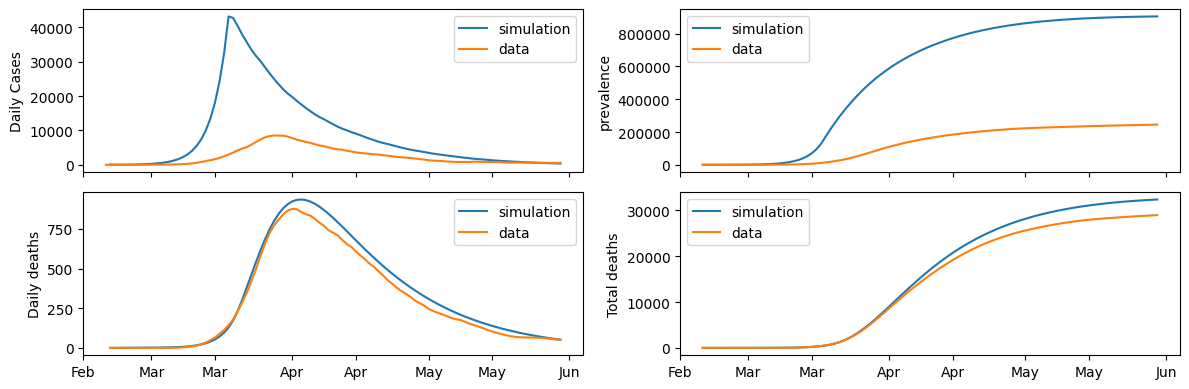

In [195]:
scale_inf  = 0.2
scale_deah = 1

fig, axes = plt.subplots(2,2, figsize=(12,4), sharex=True)

axes[0,0].plot(sim_daily_cases, label="simulation")
axes[0,0].plot(real_daily_cases, label="data")
axes[0,0].legend()
axes[0,0].set_ylabel("Daily Cases")

axes[0,1].plot(sim_total_cases, label="simulation")
axes[0,1].plot(real_total_cases, label="data")
axes[0,1].legend()
axes[0,1].set_ylabel("prevalence")


axes[1,0].plot(sim_daily_deaths, label="simulation")
axes[1,0].plot(real_daily_deaths.cumsum(), label="data")
axes[1,0].legend()
axes[1,0].set_ylabel("Daily deaths")

axes[1,1].plot(sim_total_deaths, label="simulation")
axes[1,1].plot(real_total_deaths.cumsum(), label="data")
axes[1,1].legend()
axes[1,1].set_ylabel("Total deaths")

axes[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
axes[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

fig.tight_layout()

In [33]:
sim_incidence

T
2020-02-15          NaN
2020-02-16    11.833577
2020-02-17     3.961145
2020-02-18     7.291611
2020-02-19    10.134971
                ...    
2020-05-26   -82.179733
2020-05-27   -75.800040
2020-05-28   -70.609742
2020-05-29   -65.645527
2020-05-30   -61.215772
Length: 106, dtype: float64